In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
import scikit_posthocs as sp
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.patches as mpatches

In [2]:
df = pd.read_excel("UmamiSalivation.xlsx", sheet_name='5tast')
df

,Date,Genotype,Target,Tastant,Pre (mg x10),Post (mg x 10),Unnamed: 6,Saliva (mg)
0,20210824,WT,Anterior,H2O,9841.0,9852.0,NaN,1.1
1,20210824,WT,Anterior,AceK,9871.0,9885.0,NaN,1.4
2,20210824,WT,Anterior,5mM Quinine,9841.0,9852.0,NaN,1.1
3,20210824,WT,Anterior,MPG+IMP,9798.0,9801.0,NaN,0.3
4,20210824,WT,Anterior,60mM NaCl,9908.0,9921.0,NaN,1.3
...,...,...,...,...,...,...,...,...
125,20211006,WT,Anterior,60mM NaCl,9996.0,10008.0,NaN,1.2
126,20211006,WT,Anterior,MPG+IMP,9901.0,9914.0,NaN,1.3
127,20211006,WT,Anterior,50mM Citric Acid,9877.0,9899.0,NaN,2.2
128,20211006,WT,Anterior,125mM NaCl,9967.0,9981.0,NaN,1.4


In [3]:
staging = [item for item in set(df['Tastant'].tolist()) if len(item.split(' ')) > 1]

reorder_conc_tast = {}
for item in staging:
    conc = item.split(' ')[0]
    name = ' '.join(item.split(' ')[1:])
    
    reorder_conc_tast[item] = f'{name}\n{conc}'
reorder_conc_tast['MPG+IMP'] = 'MPG 50mM\n+ IMP 1mM'
reorder_conc_tast['AceK'] = 'AceK\n30mM'

In [4]:
df = df.rename(index = reorder_conc_tast)
df

,Date,Genotype,Target,Tastant,Pre (mg x10),Post (mg x 10),Unnamed: 6,Saliva (mg)
0,20210824,WT,Anterior,H2O,9841.0,9852.0,NaN,1.1
1,20210824,WT,Anterior,AceK,9871.0,9885.0,NaN,1.4
2,20210824,WT,Anterior,5mM Quinine,9841.0,9852.0,NaN,1.1
3,20210824,WT,Anterior,MPG+IMP,9798.0,9801.0,NaN,0.3
4,20210824,WT,Anterior,60mM NaCl,9908.0,9921.0,NaN,1.3
...,...,...,...,...,...,...,...,...
125,20211006,WT,Anterior,60mM NaCl,9996.0,10008.0,NaN,1.2
126,20211006,WT,Anterior,MPG+IMP,9901.0,9914.0,NaN,1.3
127,20211006,WT,Anterior,50mM Citric Acid,9877.0,9899.0,NaN,2.2
128,20211006,WT,Anterior,125mM NaCl,9967.0,9981.0,NaN,1.4


In [5]:
#old_tastant_order = ['H2O', '0.5mM Quinine', '5mM Quinine', 'AceK', 'MPG+IMP', '1mM IMP', '60mM NaCl', '125mM NaCl', '250mM NaCl', '125mM KCl', '250mM KCl', '10mM Citric Acid', '50mM Citric Acid']
tastant_order = ['H2O', 'MPG 50mM\n+ IMP 1mM', 'AceK\n30mM', 'Quinine\n5mM', 'NaCl\n60mM', 'NaCl\n250mM', 'Citric Acid\n50mM']

In [6]:
df = df.replace(reorder_conc_tast)
df = df[df['Tastant'].isin(tastant_order)]
df

,Date,Genotype,Target,Tastant,Pre (mg x10),Post (mg x 10),Unnamed: 6,Saliva (mg)
0,20210824,WT,Anterior,H2O,9841.0,9852.0,NaN,1.1
1,20210824,WT,Anterior,AceK\n30mM,9871.0,9885.0,NaN,1.4
2,20210824,WT,Anterior,Quinine\n5mM,9841.0,9852.0,NaN,1.1
3,20210824,WT,Anterior,MPG 50mM\n+ IMP 1mM,9798.0,9801.0,NaN,0.3
4,20210824,WT,Anterior,NaCl\n60mM,9908.0,9921.0,NaN,1.3
...,...,...,...,...,...,...,...,...
124,20211006,WT,Anterior,Quinine\n5mM,9940.0,9949.0,NaN,0.9
125,20211006,WT,Anterior,NaCl\n60mM,9996.0,10008.0,NaN,1.2
126,20211006,WT,Anterior,MPG 50mM\n+ IMP 1mM,9901.0,9914.0,NaN,1.3
127,20211006,WT,Anterior,Citric Acid\n50mM,9877.0,9899.0,NaN,2.2


In [7]:
to_plot = df.copy(deep = True)
to_plot = to_plot.groupby(['Date','Tastant','Target']).mean()
to_plot.reset_index(inplace=True)
to_plot

,Date,Tastant,Target,Pre (mg x10),Post (mg x 10),Unnamed: 6,Saliva (mg)
0,20210824,AceK\n30mM,Anterior,9871.0,9885.0,NaN,1.4
1,20210824,AceK\n30mM,Posterior,9868.0,9891.0,NaN,2.3
2,20210824,Citric Acid\n50mM,Anterior,9953.0,9980.0,NaN,2.7
3,20210824,Citric Acid\n50mM,Posterior,9940.0,9948.0,NaN,0.8
4,20210824,H2O,Anterior,9841.0,9852.0,NaN,1.1
...,...,...,...,...,...,...,...
91,20211006,NaCl\n250mM,Posterior,9994.0,10019.0,NaN,2.5
92,20211006,NaCl\n60mM,Anterior,9996.0,10008.0,NaN,1.2
93,20211006,NaCl\n60mM,Posterior,9966.0,9977.0,NaN,1.1
94,20211006,Quinine\n5mM,Anterior,9940.0,9949.0,NaN,0.9


In [8]:
by_loc = to_plot[to_plot['Target']=='Anterior'][['Date','Tastant','Target']]
by_loc['Posterior'] = to_plot[to_plot['Target']=='Posterior']['Saliva (mg)'].tolist()
by_loc['Anterior'] = to_plot[to_plot['Target']=='Anterior']['Saliva (mg)'].tolist()
by_loc['Difference'] = by_loc['Posterior']-by_loc['Anterior']
by_loc = by_loc[by_loc['Date']!=20210824]
by_loc = by_loc[by_loc['Date']!=20210826]
by_loc

,Date,Tastant,Target,Posterior,Anterior,Difference
26,20210827,AceK\n30mM,Anterior,1.9,1.4,0.5
28,20210827,Citric Acid\n50mM,Anterior,1.1,2.6,-1.5
30,20210827,H2O,Anterior,1.1,1.0,0.1
32,20210827,MPG 50mM\n+ IMP 1mM,Anterior,2.0,1.1,0.9
34,20210827,NaCl\n250mM,Anterior,1.8,2.8,-1.0
36,20210827,NaCl\n60mM,Anterior,1.5,1.9,-0.4
38,20210827,Quinine\n5mM,Anterior,2.2,1.8,0.4
40,20210830,AceK\n30mM,Anterior,2.9,1.1,1.8
42,20210830,Citric Acid\n50mM,Anterior,1.8,2.2,-0.4
44,20210830,H2O,Anterior,1.0,1.5,-0.5


In [9]:
by_tast = to_plot[to_plot['Tastant']=='H2O'][['Date', 'Target']]
by_tast['H2O'] = to_plot[to_plot['Tastant']=='H2O']['Saliva (mg)'].tolist()
by_tast['Umami'] = to_plot[to_plot['Tastant']=='MPG 50mM\n+ IMP 1mM']['Saliva (mg)'].tolist()
by_tast['Difference'] = by_tast['Umami'] - by_tast['H2O']
by_tast = by_tast[by_tast['Date']!=20210824]
by_tast

,Date,Target,H2O,Umami,Difference
18,20210826,Anterior,1.3,1.3,0.0
19,20210826,Posterior,1.5,2.1,0.6
30,20210827,Anterior,1.0,1.1,0.1
31,20210827,Posterior,1.1,2.0,0.9
44,20210830,Anterior,1.5,2.0,0.5
45,20210830,Posterior,1.0,3.1,2.1
58,20210927,Anterior,1.0,0.6,-0.4
59,20210927,Posterior,1.1,2.7,1.6
72,20210929,Anterior,1.3,0.6,-0.7
73,20210929,Posterior,1.2,1.9,0.7


In [10]:
tastant_order

['H2O',
 'MPG 50mM\n+ IMP 1mM',
 'AceK\n30mM',
 'Quinine\n5mM',
 'NaCl\n60mM',
 'NaCl\n250mM',
 'Citric Acid\n50mM']

In [11]:
def color(number):
    return sns.color_palette('colorblind')[number]

In [12]:
colors = {'H2O':sns.color_palette('gray')[0], 'MPG 50mM\n+ IMP 1mM':color(0), 'AceK\n30mM':color(1),
         'Quinine\n5mM':color(2), 'NaCl\n60mM':color(3), 'NaCl\n250mM':color(4), 'Citric Acid\n50mM':color(5)}

In [13]:
colors = {'H2O':sns.color_palette('gray')[0], 'MPG+IMP':color(0), 'AceK':color(1),
         'Quinine':color(2), '60mM NaCl':color(3), '250mM NaCl':color(4), 'Citric Acid':color(5)}

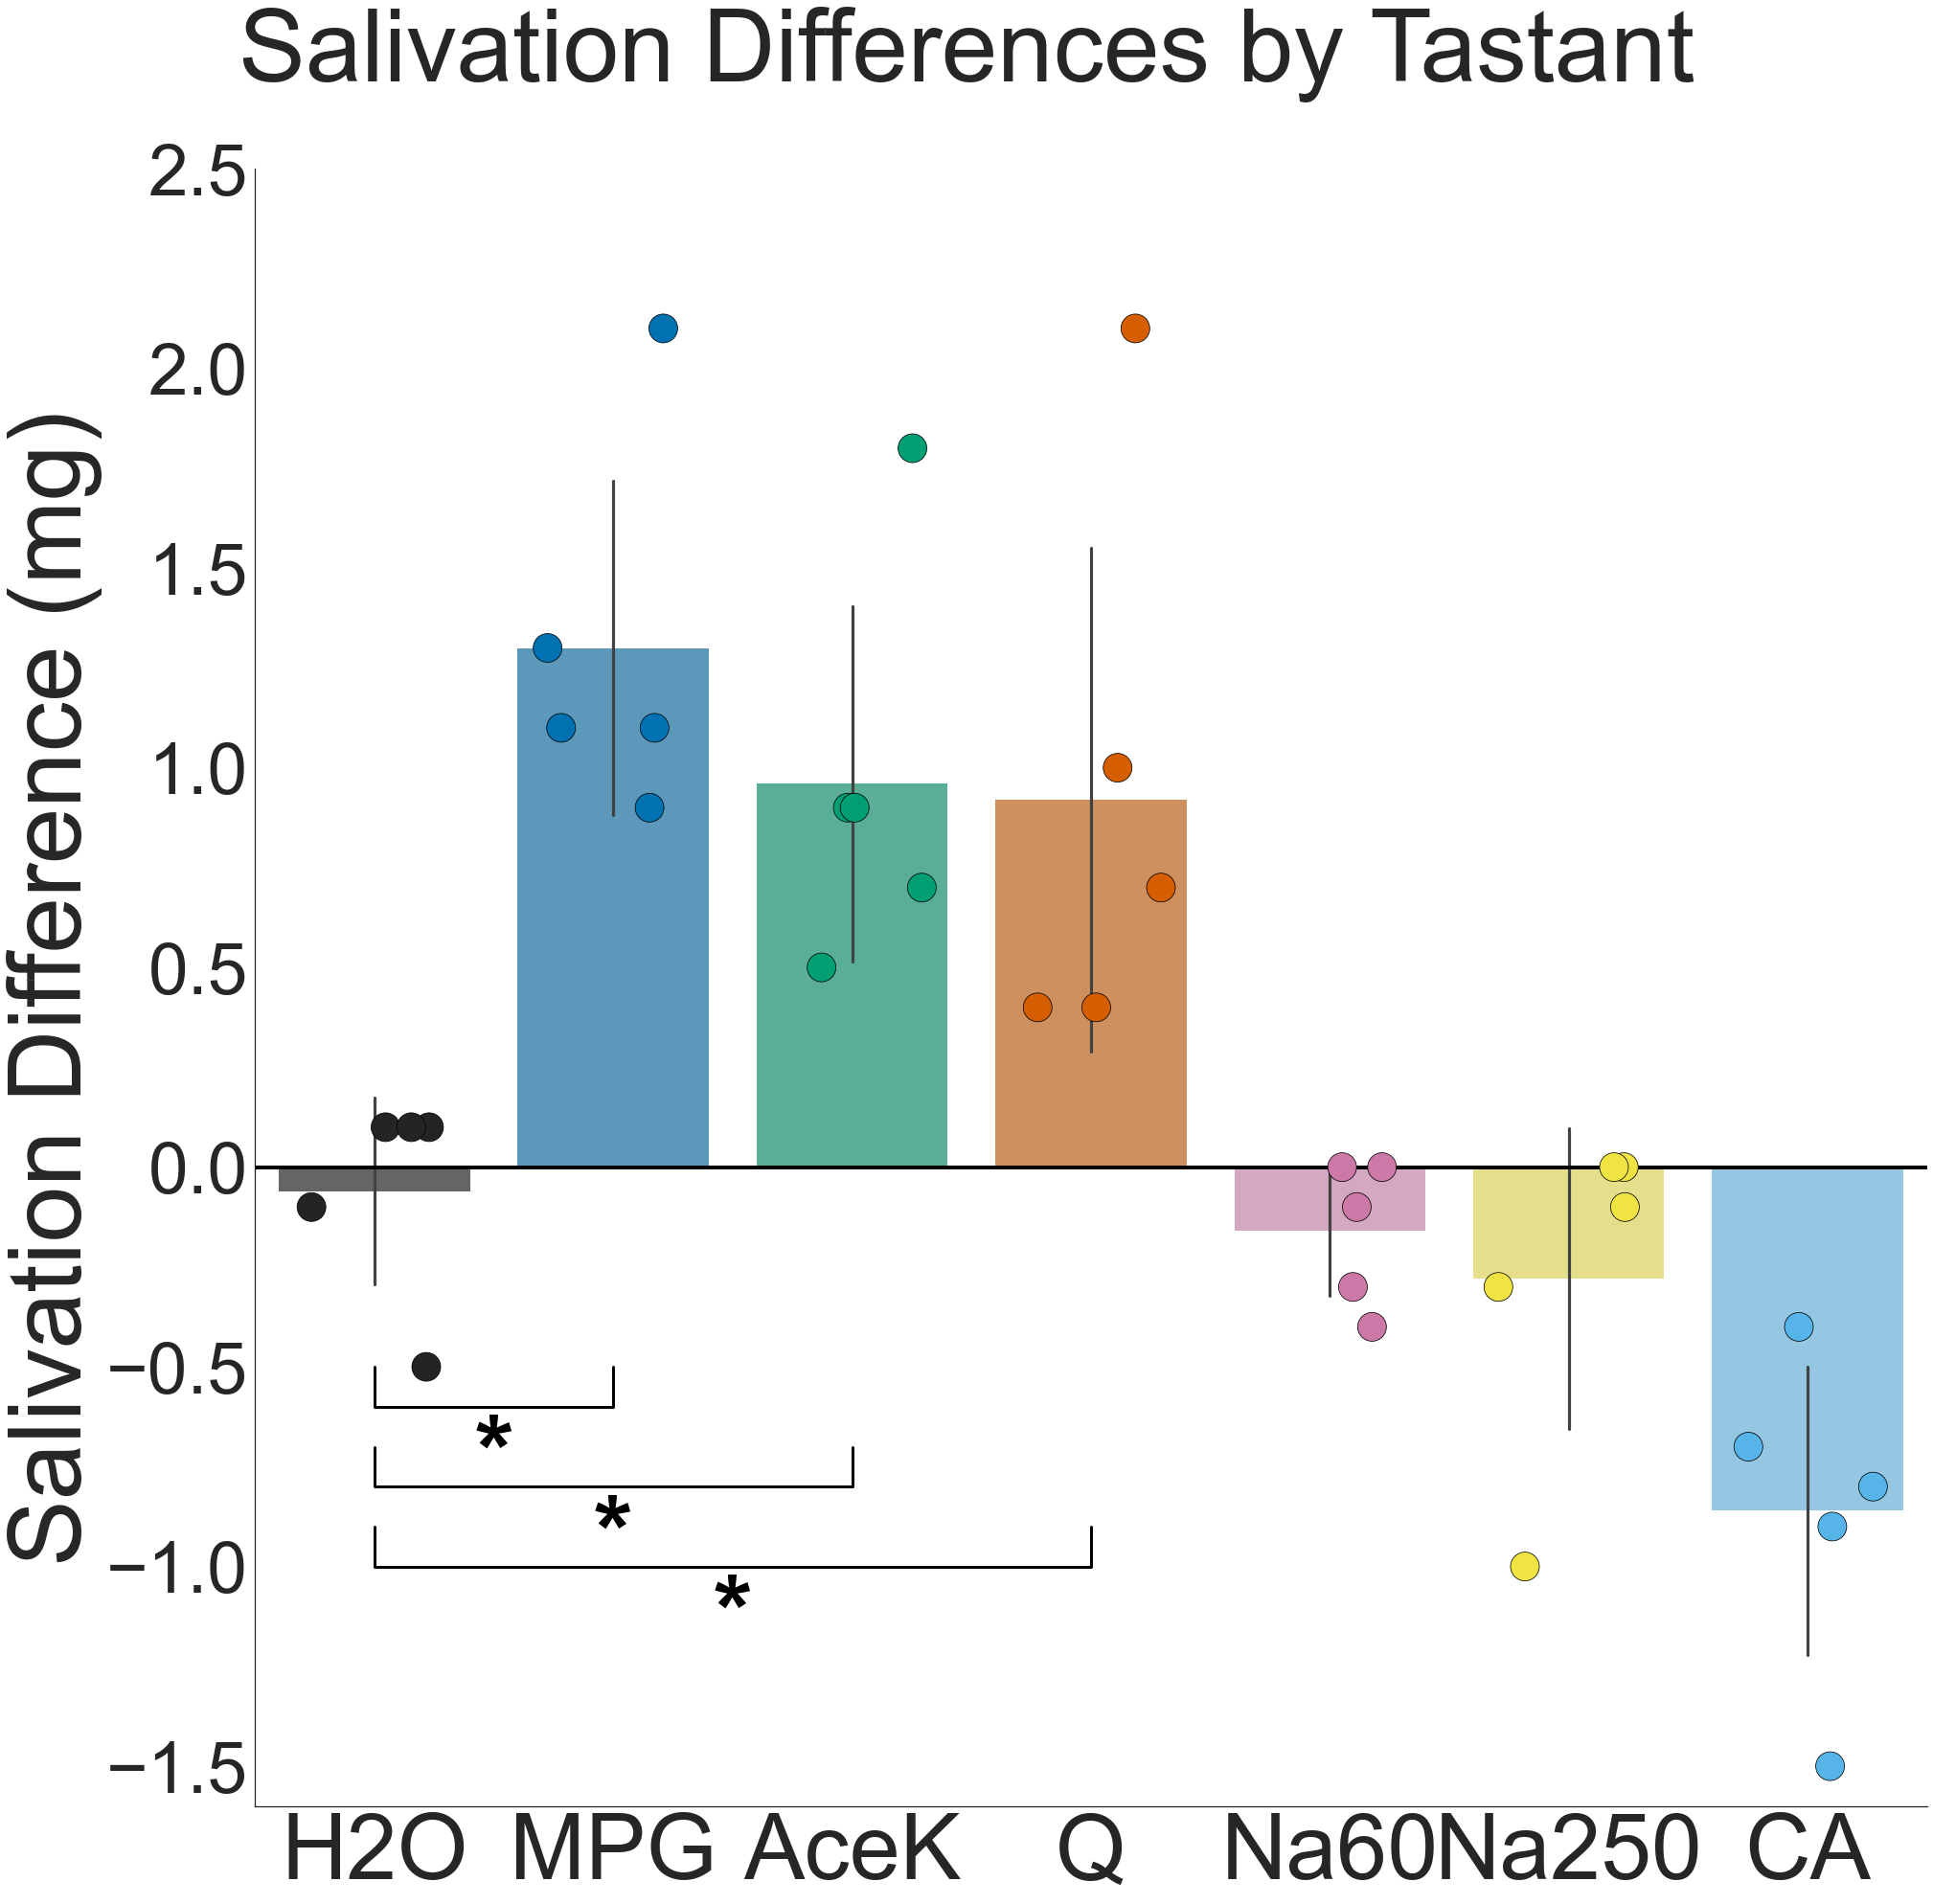

In [154]:
to_plot = by_loc.copy(deep=True)
old = ['H2O','MPG 50mM\n+ IMP 1mM', 'AceK\n30mM', 'Quinine\n5mM',  'NaCl\n60mM','NaCl\n250mM','Citric Acid\n50mM']
new = ['H2O', 'MPG', 'AceK', 'Q', 'Na60', 'Na250', 'CA']
to_plot = to_plot.replace(old, new)

my_order = new

colors = {my_order[0]:sns.color_palette('gray')[0], my_order[1]:color(0), my_order[2]:color(1),
         my_order[3]:color(2), my_order[4]:color(3), my_order[5]:color(4), my_order[6]:color(5)}

my_jitter = 0.3

my_font = 75

sns.set(font_scale = 6)

sns.set_style(style = "white")
# Draw the bar chart
fig, ax = plt.subplots(figsize = (30,30))
ax.set_ylim(-1.6,2.5)
sns.barplot(
    data=to_plot, 
    x="Tastant",
    y="Difference", 
    #hue="Genotype", 
    alpha=0.7, 
    palette = colors,
    #palette = 'colorblind',
    ci='sd',
    order = my_order
    #order = tastant_order
)

# Draw the stripplot
sns.stripplot(
    data=to_plot, 
    x="Tastant", 
    y="Difference", 
    #hue="Genotype", 
    dodge=True, 
    edgecolor="Black", 
    linewidth=.75,
    palette = colors,
    #palette = 'colorblind',
    ax=ax,
    jitter = my_jitter,
    size = 30,
    order = my_order
)

plt.gcf().suptitle("Salivation Induced in Skn1-KO -/- Animals",fontsize=my_font*1.4)

#Setting axes labels, ticks, and a Y = 0 line
ax.set_ylabel('Salivation Difference (mg)', fontsize = my_font*1.4)
ax.set_xlabel('')

plt.yticks(fontsize = my_font)
plt.xticks(fontsize = my_font+20)
plt.axhline(y=0, marker = 'x', color = 'k', linewidth = 4)
#plt.show()

#Adding Significance bars
sig_bar = -0.5
comp = 1
plt.plot([0,0, comp, comp], [sig_bar, sig_bar-0.1, sig_bar-0.1, sig_bar], linewidth=3, color='k')
plt.text(comp/2, sig_bar-0.3, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

sig_bar -= 0.2
comp += 1
plt.plot([0,0, comp, comp], [sig_bar, sig_bar-0.1, sig_bar-0.1, sig_bar], linewidth=3, color='k')
plt.text(comp/2, sig_bar-0.3, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

sig_bar -= 0.2
comp += 1
plt.plot([0,0, comp, comp], [sig_bar, sig_bar-0.1, sig_bar-0.1, sig_bar], linewidth=3, color='k')
plt.text(comp/2, sig_bar-0.3, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')


sns.despine()

plt.gcf().suptitle("Salivation Differences by Tastant",fontsize=my_font*1.4)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("5tast_plots/5tast_diffByTast")

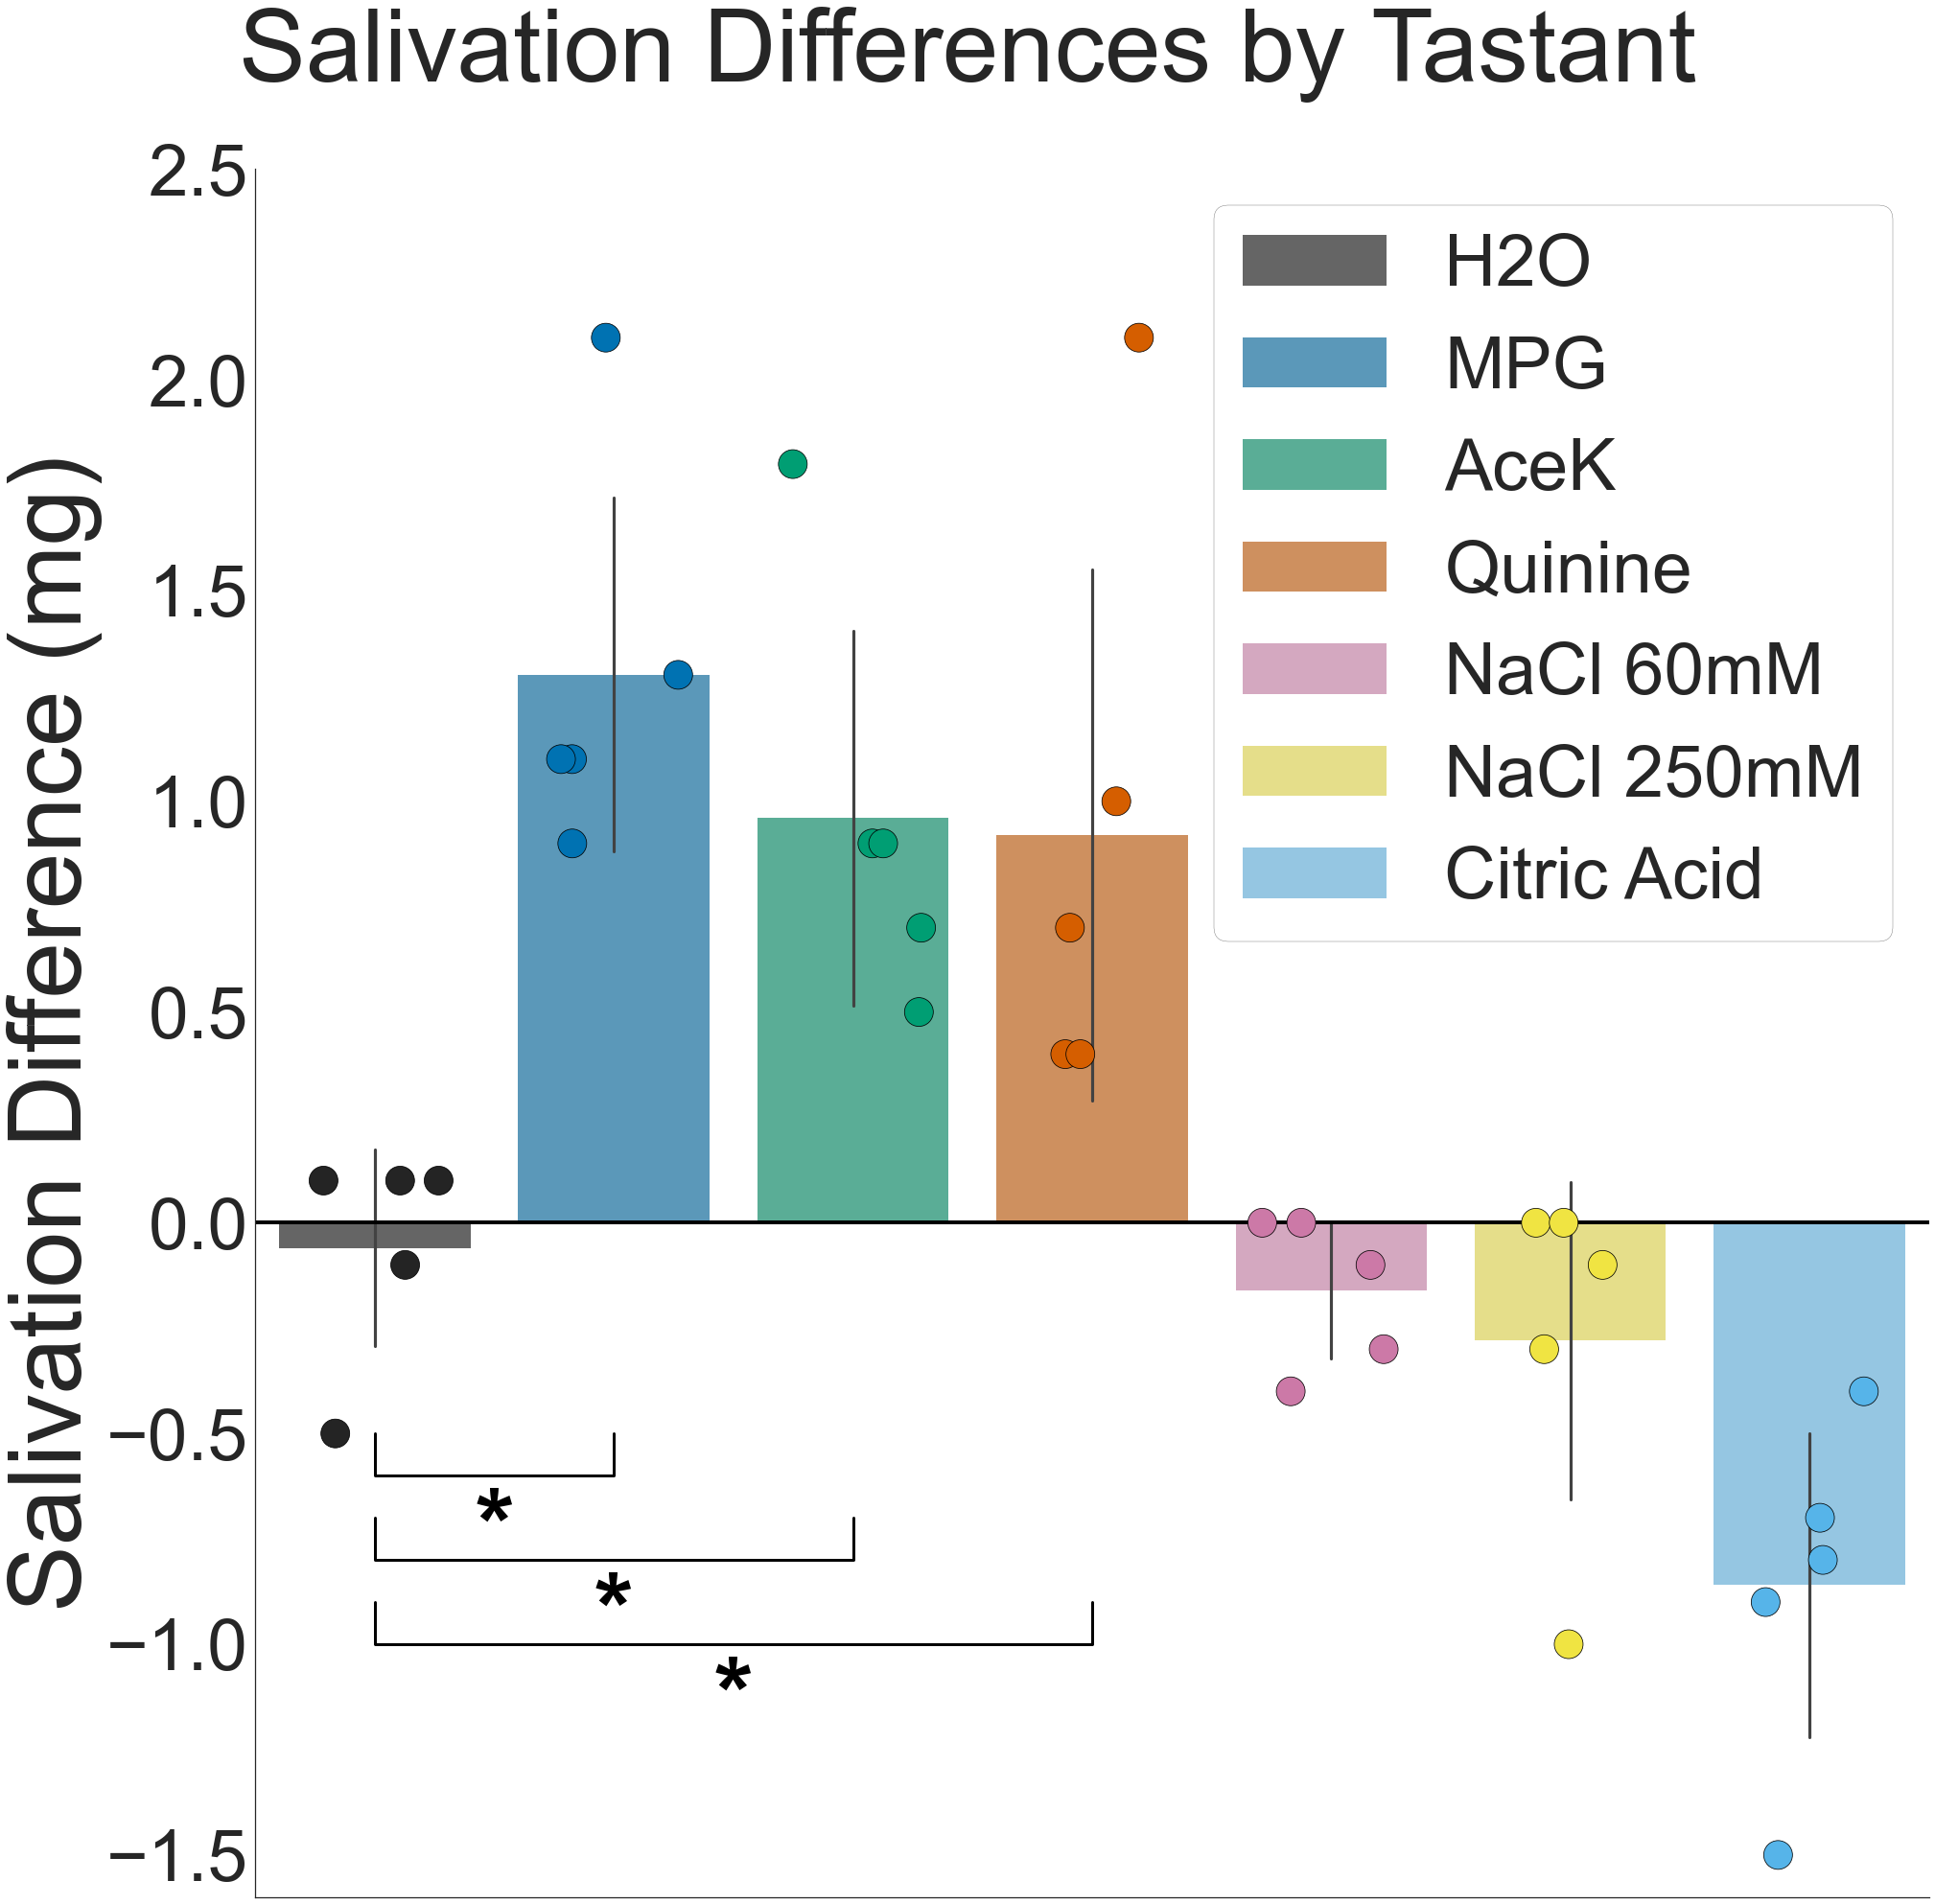

In [166]:
#Trying the plot wiht a legend

to_plot = by_loc.copy(deep=True)
old = ['H2O','MPG 50mM\n+ IMP 1mM', 'AceK\n30mM', 'Quinine\n5mM',  'NaCl\n60mM','NaCl\n250mM','Citric Acid\n50mM']
new = ['H2O', 'MPG', 'AceK', 'Quinine', 'NaCl 60mM', 'NaCl 250mM', 'Citric Acid']
to_plot = to_plot.replace(old, new)

my_order = new

colors = {my_order[0]:sns.color_palette('gray')[0], my_order[1]:color(0), my_order[2]:color(1),
         my_order[3]:color(2), my_order[4]:color(3), my_order[5]:color(4), my_order[6]:color(5)}

my_jitter = 0.3

my_font = 75

sns.set(font_scale = 6)

sns.set_style(style = "white")
# Draw the bar chart
fig, ax = plt.subplots(figsize = (30,30))
ax.set_ylim(-1.6,2.5)
bar1 = sns.barplot(
    data=to_plot, 
    x="Tastant",
    y="Difference", 
    hue="Tastant", 
    alpha=0.7, 
    palette = colors,
    #palette = 'colorblind',
    ci='sd',
    order = my_order,
    #order = tastant_order,
    dodge = False
)

# Get the legend from just the bar chart
handles, labels = ax.get_legend_handles_labels()

#ax.legend(
    #handles=handles,
    #labels=labels,
    #label_order = my_order,
    #loc= 9,
    #loc = 'best',
    #bbox_to_anchor=(1.25, .5),
    #fontsize = my_font,
#)



# Draw the stripplot
strip1 = sns.stripplot(
    data=to_plot, 
    x="Tastant", 
    y="Difference", 
    #hue="Tastant", 
    dodge=False, 
    edgecolor="Black", 
    linewidth=.75,
    palette = colors,
    #palette = 'colorblind',
    ax=ax,
    jitter = my_jitter,
    size = 30,
    order = my_order,
)

# Remove the old legend
#ax.legend_.remove()

order = [2,3,0,6,5,4,1]

#add legend to plot
plt.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order], 
           fontsize = my_font, 
           loc='best', 
           frameon = True,
           edgecolor = 'k',
          ) 


#ax.legend(label_order = my_order)

plt.gcf().suptitle("Salivation Induced in Skn1-KO -/- Animals",fontsize=my_font*1.4)

ax.set_ylabel('Salivation Difference (mg)', fontsize = my_font*1.4)
ax.set_xlabel('')

plt.yticks(fontsize = my_font)
plt.xticks([],fontsize = my_font+20)
plt.axhline(y=0, marker = 'x', color = 'k', linewidth = 4)
#plt.show()

plt.gcf().suptitle("Salivation Differences by Tastant",fontsize=my_font*1.4)
plt.gcf().tight_layout(rect=[0, 0.03, 1, 0.95])

sns.despine()

sig_bar = -0.5
comp = 1
plt.plot([0,0, comp, comp], [sig_bar, sig_bar-0.1, sig_bar-0.1, sig_bar], linewidth=3, color='k')
plt.text(comp/2, sig_bar-0.3, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

sig_bar -= 0.2
comp += 1
plt.plot([0,0, comp, comp], [sig_bar, sig_bar-0.1, sig_bar-0.1, sig_bar], linewidth=3, color='k')
plt.text(comp/2, sig_bar-0.3, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

sig_bar -= 0.2
comp += 1
plt.plot([0,0, comp, comp], [sig_bar, sig_bar-0.1, sig_bar-0.1, sig_bar], linewidth=3, color='k')
plt.text(comp/2, sig_bar-0.3, "*", horizontalalignment='center', size='x-large', color='black', weight='semibold')

plt.savefig("5tast_plots/5tast_diffByTast_withLegend")

In [162]:
?plt.legend

In [81]:
to_plot = to_plot.groupby('Tastant').mean().reset_index()
to_plot['SEM'] = by_loc.groupby('Tastant').sem().reset_index()['Difference']
to_plot

,Tastant,Date,Posterior,Anterior,Difference,SEM
0,AceK,20210903.8,2.12,1.16,0.96,0.222711
1,Citric \nAcid,20210903.8,1.20,2.06,-0.86,0.180555
2,H2O,20210903.8,1.10,1.16,-0.06,0.116619
3,MPG,20210903.8,2.42,1.12,1.30,0.209762
4,NaCl\n250mM,20210903.8,2.34,2.62,-0.28,0.188149
5,NaCl\n60mM,20210903.8,1.48,1.64,-0.16,0.081240
6,Quin,20210903.8,2.14,1.22,0.92,0.315278


In [60]:
?ax

In [ ]:
AceK = by_loc[by_loc['Tastant']=='AceK\n30mM']['Difference'].tolist()
Quinine = by_loc[by_loc['Tastant']=='Quinine\n5mM']['Difference'].tolist()
lNaCl = by_loc[by_loc['Tastant']=='NaCl\n60mM']['Difference'].tolist()
hNaCl = by_loc[by_loc['Tastant']=='NaCl\n250mM']['Difference'].tolist()
Umami = by_loc[by_loc['Tastant']=='MPG 50mM\n+ IMP 1mM']['Difference'].tolist()
CA = by_loc[by_loc['Tastant']=='Citric Acid\n50mM']['Difference'].tolist()
H2O = by_loc[by_loc['Tastant']=='H2O']['Difference'].tolist()

In [ ]:
stats.friedmanchisquare(AceK, Quinine, lNaCl, hNaCl, Umami, CA, H2O)

In [ ]:
#stats.dunn([AceK, Quinine, lNaCl, hNaCl, Umami, CA, H2O])

In [ ]:
?sns.barplot

In [ ]:
data = by_loc['Difference'].tolist()


In [ ]:
data = by_loc['Difference'].tolist()

stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [ ]:
data = by_loc['Difference'].tolist()

result = stats.anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
data = by_loc['Difference'].tolist()

stat, p = stats.normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [ ]:
comp = ['AceK\n30mM', 'Citric Acid\n50mM', 'MPG 50mM\n+ IMP 1mM', 'NaCl\n250mM', 'NaCl\n60mM', 'Quinine\n5mM']
simple = ['AceK', 'Citric Acid', 'MPG+IMP', '250mM NaCl', '60mM NaCl', 'Quinine']
diff = by_loc.copy(deep = True)
diff = diff.replace(to_replace = comp, value= simple)

highSalt = diff.loc[diff['Tastant']=='250mM NaCl']['Difference'].tolist()
lowSalt = diff.loc[diff['Tastant']=='60mM NaCl']['Difference'].tolist()
sweet = diff.loc[diff['Tastant']=='AceK']['Difference'].tolist()
bitter = diff.loc[diff['Tastant']=='Quinine']['Difference'].tolist()
umami = diff.loc[diff['Tastant']=='MPG+IMP']['Difference'].tolist()
sour = diff.loc[diff['Tastant']=='Citric Acid']['Difference'].tolist()
h2o = diff.loc[diff['Tastant']=='H2O']['Difference'].tolist()

list(map(len, [highSalt, lowSalt, sweet, bitter, umami, sour, h2o]))

In [ ]:
data = sweet.copy()
data.extend(h2o)

stat, p = stats.shapiro(data)
print('Sweet + H2O Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

result = stats.anderson(data)
print('Anderson Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
        
stat, p = stats.normaltest(data)
print('Normaltest Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.ttest_rel(sweet, h2o)
print(f'T-Test Stastic = {stat}, p={p/2}')
print(f'After 3 tests p is {p*3/2}')

In [ ]:
data = bitter.copy()
data.extend(h2o)

stat, p = stats.shapiro(data)
print('bitter + H2O Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

result = stats.anderson(data)
print('Anderson Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
        
stat, p = stats.normaltest(data)
print('Normaltest Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.ttest_rel(bitter, h2o)
print(f'T-Test Stastic = {stat}, p={p/2}')

In [ ]:
data = umami.copy()
data.extend(h2o)

stat, p = stats.shapiro(data)
print('umami + H2O Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

result = stats.anderson(data)
print('Anderson Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
        
stat, p = stats.normaltest(data)
print('Normaltest Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.ttest_rel(umami, h2o)
print(f'T-Test Stastic = {stat}, p={p/2}')
print(f'After 4 tests p = {p*4/2}')

In [ ]:
data = sour.copy()
data.extend(h2o)

stat, p = stats.shapiro(data)
print('sour + H2O Shapiro Statistics=%.3f, p=%.3f' % (stat, p))

result = stats.anderson(data)
print('Anderson Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
        
stat, p = stats.normaltest(data)
print('Normaltest Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = stats.ttest_rel(sour, h2o)
print(f'T-Test Stastic = {stat}, p={p/2}')

In [ ]:
p

In [ ]:
?stats.ttest_ind

In [ ]:
?stats.ttest_rel

In [ ]:
data = np.array([h2o,umami, sweet, bitter, lowSalt,highSalt, sour])
sp.posthoc_nemenyi_friedman(data.T)

In [ ]:
scale = 49/4
nemenyi = {}
nemenyi['umami'] = 0.163405/scale
nemenyi['sweet'] = 0.566582/scale
nemenyi['bitter'] = 0.479275/scale
nemenyi['sour'] = 0.738735/scale
nemenyi

In [ ]:
#categories = ['H2O', 'MPG+IMP', 'AceK', 'Quinine', 'Citric Acid','60mM NaCl', '250mM NaCl']

#diff['Tastant'] = pd.Categorical(diff['Tastant'],categories=categories,ordered=True)
diff = diff.sort_values('Tastant',ascending=True)
diff

In [ ]:
tukey = pairwise_tukeyhsd(endog=diff['Difference'],
                          groups=diff['Tastant'],
                          alpha=0.05)

In [ ]:
print(tukey)

In [ ]:
stats.f_oneway(h2o, umami, sweet, bitter, lowSalt, highSalt, sour)

In [ ]:
graphpad = diff.T
graphpad.to_excel('5Taste_Diff.xlsx')

In [ ]:
#Anova results via graphpad
#SSA =19.16, DF - 6, MSA = 3.193, F(2.537, 10.15) = 15.87, p = 0.0005
#Post Hocs
#H2O vs. MPG+IMP, q = 4.267, p=0.0448
#H2O vs. AceK, q = 5.499, p = 0.0188
#The rest are N.S.

In [ ]:
anova = diff.copy(deep=True)

In [ ]:
mean_a = anova.copy(deep=True).groupby(['Tastant']).mean()
mean_a

In [ ]:
mean_s = anova.copy(deep=True).groupby(['Date']).mean()
mean_s

In [ ]:
grand_mean = np.mean(anova['Difference'].tolist())

A = 7
S = 5

df_A = A-1
df_S = S-1
df_AS = (df_A)*(df_S)
grand_mean

In [ ]:
mean_a['A'] = (mean_a['Difference']-grand_mean)**2
mean_s['S'] = (mean_s['Difference']-grand_mean)**2
mean_a

In [ ]:
SS_A = S*sum(mean_a['A'])
SS_S = A*sum(mean_s['S'])
[SS_A, SS_S]

In [ ]:
np.mean(anova[anova['Tastant']=='H2O']['Difference'].tolist())

In [ ]:
for item in ['H2O', 'MPG+IMP', 'AceK', 'Quinine', 'Citric Acid', '60mM NaCl', '250mM NaCl']:
    anova.loc[anova['Tastant']==item, 'Ma'] = np.mean(anova[anova['Tastant']==item]['Difference'].tolist())

for mouse in set(anova['Date']):
    anova.loc[anova['Date']==mouse, 'Ms'] = np.mean(anova[anova['Date']==mouse]['Difference'].tolist())

In [ ]:
anova['SA'] = (anova['Difference'] - anova['Ma'] - anova['Ms'] + grand_mean)**2
SS_SA = sum(anova['SA'])
SS_SA

my_SS = ['SS_A', 'SS_S', 'SS_SA']

In [ ]:
MS_A = SS_A/df_A
MS_S = SS_S/df_S
MS_AS = SS_SA/df_AS

my_MS = [MS_A, MS_S, MS_AS]

In [ ]:
A_Fscore = MS_A/MS_AS
S_Fscore = '--'
AS_Fscore = '--'

my_Fscores = [A_Fscore, S_Fscore, AS_Fscore]

p_a = stats.f.sf(A_Fscore, df_A, df_AS)
p_s = '--'
p_as = '--'

my_Pvalues = [p_a, p_s, p_as]

my_df = [df_A, df_S, df_AS]

In [ ]:
results = {'sum_sq':my_SS,
           'mean_sq':my_MS,
           'df':my_df,
           'F':my_Fscores,
            'PR(>F)':my_Pvalues}
columns=['sum_sq', 'mean_sq','df', 'F', 'PR(>F)']
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['Tastant', 'Subject', 'Tastant x Subject'])
aov_table1